In [44]:
import numpy as np
import matplotlib.pyplot as plt
#import cufflinks as cf
#import plotly.figure_factory as ff
#import plotly.offline as py
#cf.go_offline()
#cf.set_config_file(offline=True, world_readable=True)
import pandas as pd
import numpy as np
#import seaborn as sns
import math

In [45]:
T = 20
kb = 1.380648813e-23
u = 1.6605389e-27
freq = np.logspace(-1,3,3000)

In [46]:
# define dimensions
R = 75e-3
h = 80e-3
m = 3.25

#R = 6.35e-3
#h = 6.35e-3
#m = 1.77e-3

In [47]:
#define pressure
#p = 30e-6
p = 58e-6 #mbar
m0 = 18.01528*u #h20 molecule mass


In [48]:
v_T = np.sqrt(kb*T/m0)

In [49]:
beta_tra = np.pi*(R**2)*np.sqrt(8/np.pi)*(1+h/(2*R) + np.pi/4)*(p/v_T)
beta_rot = np.pi*(R**4)*np.sqrt(1/(2*np.pi))*(1+2*h/R)*(p/v_T)

In [50]:
beta_tra

3.947383641005793e-08

In [51]:
#Fluctuation-dissipation theorem defining the spectral densities
S_f_t = 4*kb*T*beta_tra
S_f_r = 4*kb*T*beta_rot

In [52]:
Sft = S_f_t/((m**2)*(2*np.pi*freq)**4)
Sfr = S_f_r/((m**2)*(2*np.pi*freq)**4)

Disp = 2*np.sqrt(Sft)

In [53]:
#at_10Hz

Sften = S_f_t/((m**2)*(2*np.pi*10)**4)
print('ASD @ 10Hz:',2*np.sqrt(Sften))

ASD @ 10Hz: 1.0292672916709776e-18


In [54]:
FullASD = np.vstack((Disp, freq))
FullASD[0]

array([1.02926729e-14, 1.02296463e-14, 1.01670055e-14, ...,
       1.04198936e-22, 1.03560879e-22, 1.02926729e-22])

In [55]:

np.save('DampASD',FullASD)

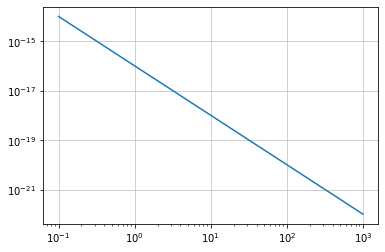

In [56]:
plt.figure()
plt.loglog(freq, Disp)
plt.grid(linewidth=0.6)
plt.show()

In [57]:
d = {'Spectra':Disp,'Frequency':freq}
import pandas as pd

In [58]:
dicta = pd.DataFrame(d)

In [59]:
dicta

Spectra    Frequency
0     1.029267e-14     0.100000
1     1.022965e-14     0.100308
2     1.016701e-14     0.100616
3     1.010475e-14     0.100926
4     1.004287e-14     0.101236
...            ...          ...
2995  1.054869e-22   987.790598
2996  1.048409e-22   990.828902
2997  1.041989e-22   993.876551
2998  1.035609e-22   996.933574
2999  1.029267e-22  1000.000000

[3000 rows x 2 columns]

In [60]:
#dicta.iplot(kind='scatter', x='Frequency',y="Spectra" ,xaxis_type="log", yaxis_type="log")

## Proximity effects

In [189]:
#Re = 75e-3
#d2 = np.linspace(10e-4,1,3000)
#d = 1e-2
#factor1 = np.pi*(Re**4)*p*(8*np.pi*m0*kb*T)**1/2
#factor2 = (d**2)*np.log(1+((Re**2)/(d**2))**2)

#dSF0 = factor1/factor2


#Sft2 = 0.78*dSF0/((m**2)*(2*np.pi*freq)**4)
#Disp2 = np.sqrt(9.22*Sft2)

In [16]:
#A = 1
#B = 0.78

#factorp1 = np.pi*(Re**2)*p*(8*np.pi*m0*kb*T)**1/2
#factorp2 = Re**2/((d2**2)*np.log(1+((Re**2)/(d2**2))**2))-1

#Disp3p = np.sqrt(9.22*factorp1*factorp2)
#Displ = Disp3p/((m**2)*(2*np.pi*freq)**4)
#Sf_d = A*Disp + B*Displ